## 방안 2
**플라스크 연동 실패 시 방안2로 으로 ngrok을 이용하여 streamlit 라이브러리를 사용한 웹페이지를 구현한다.**

* ngrok 이란
** ngrok 플랫폼은 NAT와 방화벽 뒤에 있는 사내 로컬 서버를 안전한 터널을 통해 공개 인터넷에 노출할 수 있도록 지원해주는 플랫폼으로 방화벽에서 포트 포워딩 같은 네트워크 환경 설정 변경없이 로컬에 실행중인 서버를 외부에서 접근 가능하다.
** 로컬 웹사이트를 빠르고 쉽게 온라인으로 접속할 수 있게 해주는 서비스.




In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
# 모델 불러오기
from tensorflow.keras.models import load_model
import os

model = load_model('/content/drive/MyDrive/Colab Notebooks/model_mobilenet.h5')

In [78]:
!pip install streamlit -q
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
# !unzip -qq "/content/drive/My Drive/Colab Notebooks/project/ngrok-v3-stable-windows-amd64.zip"

In [101]:
from pyngrok import ngrok

# 발급 받은 토큰 입력
ngrok.set_auth_token('2IxKRbkkZwJRYtyOwVZ4jFGWX6B_7vu4VMxecMmTBgv1939f9')

In [82]:
# import streamlit as st

# from PIL import Image, ImageOps
# import numpy as np
# from tensorflow.keras.applications.imagenet_utils import decode_predictions # 이미지 해석 도와주는 함수

In [141]:
%%writefile app2.py 

import streamlit as st
from PIL import Image, ImageOps
import numpy as np
# from tensorflow.keras.applications.imagenet_utils import decode_predictions # 이미지 해석 도와주는 함수

from tensorflow.keras.preprocessing import image

import itertools 

# 모델 불러오기
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/model_mobilenet.h5')

vgg16_pre = model

st.title('원두 이미지 분류')
st.subheader('생두 | 라이트 | 미디움 | 다크  를 판별해드립니다.')  # 제목보다는 작은 글씨

file = st.file_uploader('', type=['jpg', 'png','jpeg'])
if file is None:
  st.text('원두 이미지를 올려주세요.')

else :
  imagee = Image.open(file)
  st.image(imagee, use_column_width=True)
  img_resized = ImageOps.fit(imagee, (160,160), Image.ANTIALIAS) # 사이즈 변형
  img_resized = img_resized.convert("RGB")
  # img_resized = np.asarray(img_resized)

  x = image.img_to_array(img_resized)
  x=np.expand_dims(x, axis=0)
  img_resized = np.vstack([x])/255

  pred = vgg16_pre.predict(img_resized,  batch_size=32)  
  decoded_pred = list(itertools.chain(* pred))
  results = ''

  # pre_argmax = decoded_pred.argmax() # 예측레이블?

  

  if decoded_pred[0]>=0.5:
    results = '생두~ 입니다'
    st.success(results)
    st.text('green {}.'.format(decoded_pred))
  elif decoded_pred[1]>=0.5:
    results = '라이트~ 원두입니다'
    st.success(results )
    st.text('light {}.'.format(decoded_pred))
  elif decoded_pred[2]>=0.5:
    results = '미디움~ 원두입니다'
    st.text('medium {}.'.format(decoded_pred))
    st.success(results)
  elif decoded_pred[3]>=0.5:
    results = '다크~ 원두입니다'
    st.success(results)
    st.text('dark {}.'.format(decoded_pred))
  
  elif 0.3 <= decoded_pred[0] <=0.49:
    results = '정확한 판별이 어려워요! 하지만 생두에 가까운듯해요*ˊᵕˋ*'
    st.success(results)
    st.text('light {}.'.format(decoded_pred))
  elif 0.3 <= decoded_pred[1] <=0.49:
    results = '정확한 판별이 어려워요! 하지만 라이트 원두에 가까운듯해요*ˊᵕˋ*'
    st.text('medium {}.'.format(decoded_pred))
    st.success(results)
  elif 0.3 <= decoded_pred[2] <=0.49:
    results = '정확한 판별이 어려워요! 하지만 미디움 원두에 가까운듯해요*ˊᵕˋ*'
    st.text('medium {}.'.format(decoded_pred))
    st.success(results)
  elif 0.3 <= decoded_pred[3] <=0.49:
    results = '정확한 판별이 어려워요! 하지만 다크 원두에 가까운듯해요*ˊᵕˋ*'
    st.success(results)
    st.text('dark {}.'.format(decoded_pred))
  else :
    st.text('{}.'.format(decoded_pred))
    st.info('정확한 판별이 어려워요..!')

Writing app2.py


In [142]:
!ls

app2.py  app.py  drive	nohup.out  sample_data


In [ ]:
! cat app.py

In [145]:
!nohup streamlit run app2.py --server.port 80 &

nohup: appending output to 'nohup.out'


In [146]:
url = ngrok.connect(port='80')
print(url)

NgrokTunnel: "http://873c-34-142-207-123.ngrok.io" -> "http://localhost:80"


In [144]:
ngrok.kill()

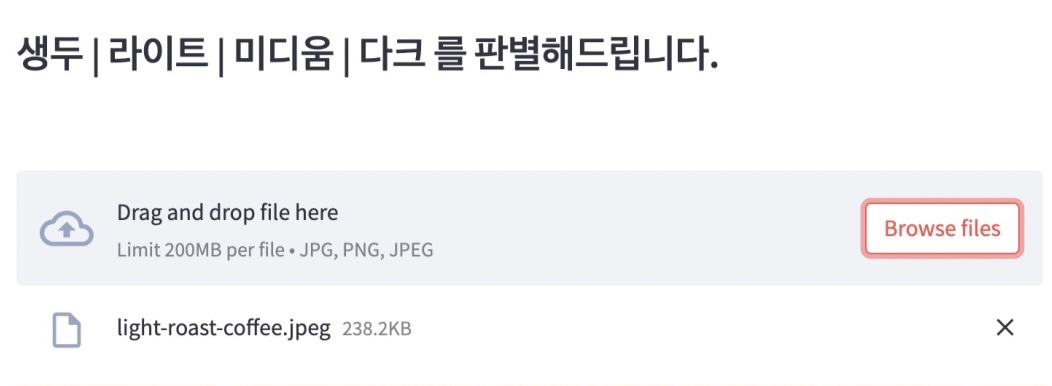

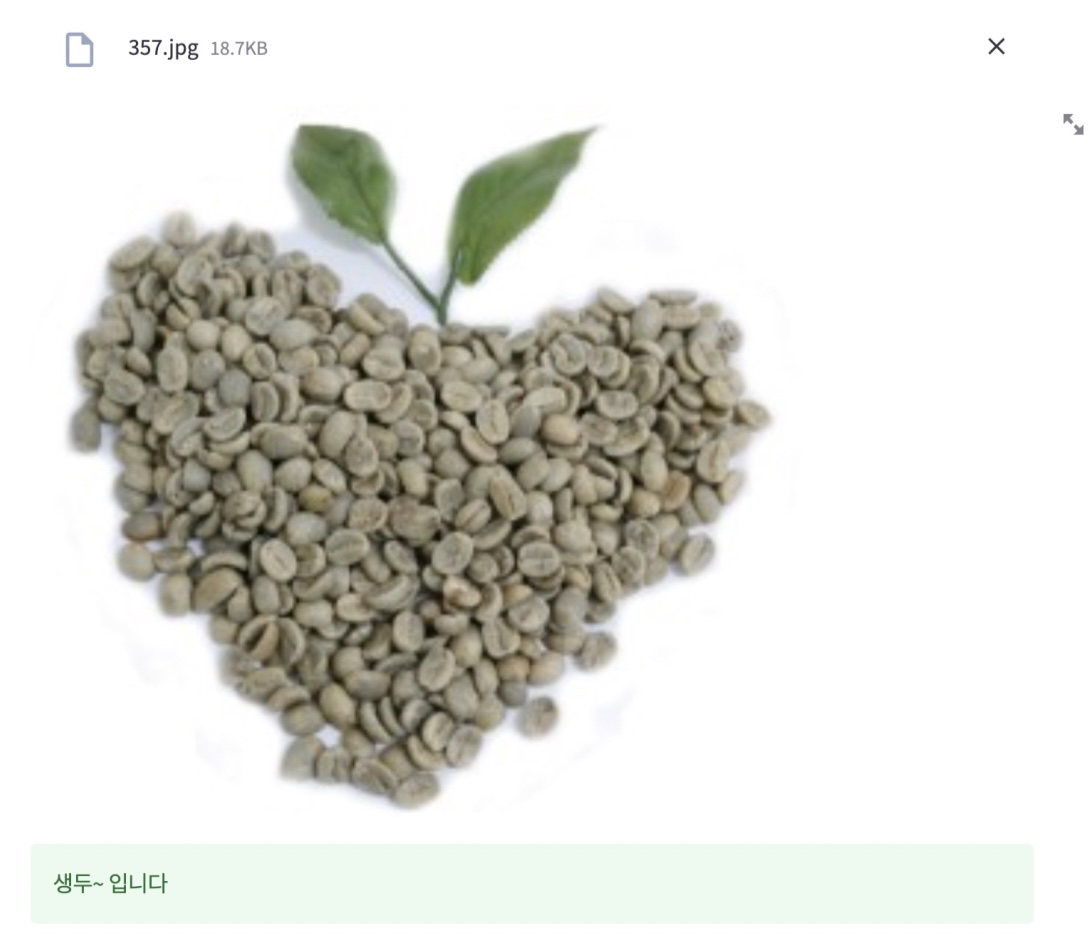